In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy 
import requests
from config import weather_api_key
from datetime import datetime
import time 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [5]:
# Build basic URL for OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i > 50):
        set_count+=1
        record_count=1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | clyde river
Processing Record 2 of Set 12 | butaritari
Processing Record 3 of Set 12 | waipawa
Processing Record 4 of Set 12 | bredasdorp
Processing Record 5 of Set 12 | rikitea
Processing Record 6 of Set 12 | punta arenas
Processing Record 7 of Set 12 | ushuaia
Processing Record 8 of Set 12 | radom
Processing Record 9 of Set 12 | rawson
Processing Record 10 of Set 12 | platteville
Processing Record 11 of Set 12 | cabo san lucas
Processing Record 12 of Set 12 | tiksi
Processing Record 13 of Set 12 | adrar
Processing Record 14 of Set 12 | luderitz
Processing Record 15 of Set 12 | hermanus
Processing Record 16 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 17 of Set 12 | lagoa
Processing Record 18 of Set 12 | thompson
Processing Record 19 of Set 12 | barrow
Processing Record 20 of Set 12 | souillac
Processing Record 21 of Set 12 | hobart
Processing Record 22 of Set 12 | russell


Processing Record 38 of Set 15 | touros
Processing Record 39 of Set 15 | fortuna
Processing Record 40 of Set 15 | carnarvon
Processing Record 41 of Set 15 | tres lagoas
Processing Record 42 of Set 15 | lavrentiya
Processing Record 43 of Set 15 | college
Processing Record 44 of Set 15 | porto walter
Processing Record 45 of Set 15 | nome
Processing Record 46 of Set 15 | gamba
Processing Record 47 of Set 15 | siauliai
Processing Record 48 of Set 15 | naryan-mar
Processing Record 49 of Set 15 | pilao arcado
City not found. Skipping...
Processing Record 50 of Set 15 | puerto ayora
Processing Record 1 of Set 16 | kaeo
Processing Record 2 of Set 16 | arraial do cabo
Processing Record 3 of Set 16 | guarapari
Processing Record 4 of Set 16 | pervomayskoye
Processing Record 5 of Set 16 | faanui
Processing Record 6 of Set 16 | omboue
Processing Record 7 of Set 16 | beyneu
Processing Record 8 of Set 16 | san andres
Processing Record 9 of Set 16 | yellapur
Processing Record 10 of Set 16 | tawkar
Cit

Processing Record 22 of Set 19 | pangnirtung
Processing Record 23 of Set 19 | leningradskiy
Processing Record 24 of Set 19 | wewak
Processing Record 25 of Set 19 | dingle
Processing Record 26 of Set 19 | ghugus
Processing Record 27 of Set 19 | douglas
Processing Record 28 of Set 19 | mrirt
City not found. Skipping...
Processing Record 29 of Set 19 | pacific grove
Processing Record 30 of Set 19 | mullaitivu
City not found. Skipping...
Processing Record 31 of Set 19 | artyk
City not found. Skipping...
Processing Record 32 of Set 19 | silvan
Processing Record 33 of Set 19 | male
Processing Record 34 of Set 19 | sangar
Processing Record 35 of Set 19 | mitu
Processing Record 36 of Set 19 | tessalit
Processing Record 37 of Set 19 | vao
Processing Record 38 of Set 19 | berlevag
Processing Record 39 of Set 19 | san patricio
Processing Record 40 of Set 19 | hirara
Processing Record 41 of Set 19 | campoverde
Processing Record 42 of Set 19 | coos bay
Processing Record 43 of Set 19 | villarrica
Pr

City not found. Skipping...
Processing Record 8 of Set 23 | gravdal
Processing Record 9 of Set 23 | bacuit
City not found. Skipping...
Processing Record 10 of Set 23 | henzada
City not found. Skipping...
Processing Record 11 of Set 23 | suntar
Processing Record 12 of Set 23 | carayao
Processing Record 13 of Set 23 | la tuque
Processing Record 14 of Set 23 | shiyan
Processing Record 15 of Set 23 | los llanos de aridane
Processing Record 16 of Set 23 | limoges
Processing Record 17 of Set 23 | sistranda
Processing Record 18 of Set 23 | ust-barguzin
Processing Record 19 of Set 23 | henties bay
Processing Record 20 of Set 23 | victoria falls
Processing Record 21 of Set 23 | emet
Processing Record 22 of Set 23 | ballina
Processing Record 23 of Set 23 | lata
Processing Record 24 of Set 23 | coromandel
Processing Record 25 of Set 23 | russellville
Processing Record 26 of Set 23 | scarborough
Processing Record 27 of Set 23 | alta floresta
Processing Record 28 of Set 23 | aleksandrovskiy zavod
P

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Clyde River,70.4692,-68.5914,-0.17,92,99,31.07,CA,2022-01-05 05:46:25
1,Butaritari,3.0707,172.7902,82.47,65,100,9.62,KI,2022-01-05 05:47:57
2,Waipawa,-41.4122,175.5153,65.93,79,98,6.98,NZ,2022-01-05 05:47:57
3,Bredasdorp,-34.5322,20.0403,68.29,63,0,9.22,ZA,2022-01-05 05:47:58
4,Rikitea,-23.1203,-134.9692,75.65,73,100,5.39,PF,2022-01-05 05:47:58
5,Punta Arenas,-53.1500,-70.9167,46.51,71,75,16.11,CL,2022-01-05 05:43:55
6,Ushuaia,-54.8000,-68.3000,37.06,93,75,2.30,AR,2022-01-05 05:47:59
7,Radom,51.4025,21.1471,42.21,80,97,7.02,PL,2022-01-05 05:47:59
8,Rawson,-43.3002,-65.1023,59.72,66,1,10.22,AR,2022-01-05 05:48:00
9,Platteville,42.7342,-90.4785,32.56,93,90,11.50,US,2022-01-05 05:48:01


In [8]:
# Reorder columns in city_data dataframe.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [9]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clyde River,CA,2022-01-05 05:46:25,70.4692,-68.5914,-0.17,92,99,31.07
1,Butaritari,KI,2022-01-05 05:47:57,3.0707,172.7902,82.47,65,100,9.62
2,Waipawa,NZ,2022-01-05 05:47:57,-41.4122,175.5153,65.93,79,98,6.98
3,Bredasdorp,ZA,2022-01-05 05:47:58,-34.5322,20.0403,68.29,63,0,9.22
4,Rikitea,PF,2022-01-05 05:47:58,-23.1203,-134.9692,75.65,73,100,5.39
...,...,...,...,...,...,...,...,...,...
556,Noyabrsk,RU,2022-01-05 06:04:33,63.1994,75.4507,-3.39,95,99,17.83
557,Carndonagh,IE,2022-01-05 06:04:33,55.2500,-7.2667,39.99,71,95,16.22
558,Broken Hill,AU,2022-01-05 06:04:33,-31.9500,141.4333,84.16,17,0,12.82
559,Sao Carlos,BR,2022-01-05 06:04:34,-22.0175,-47.8908,66.67,98,100,4.59


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

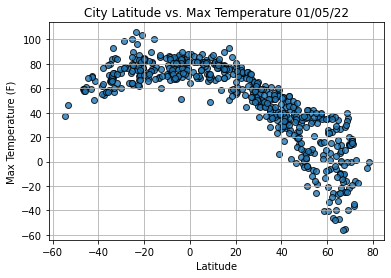

In [12]:
# Create the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Add graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save graph.
plt.savefig("weather_data/Fig1.png")

# Show Plot
plt.show()

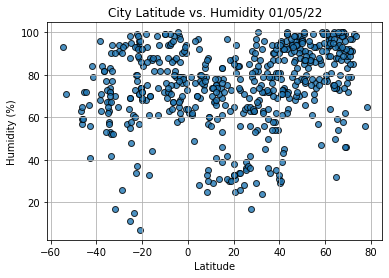

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

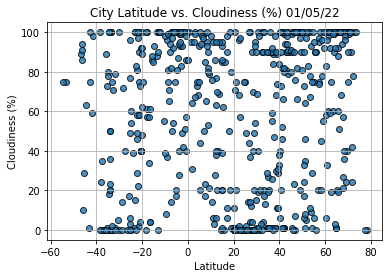

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

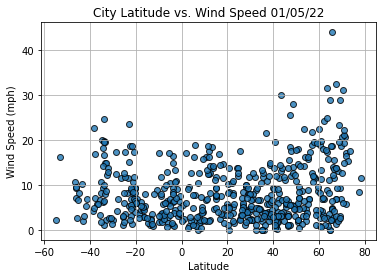

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept 
    # Get the equation of the line.
    line_eq = "y " + str(round(slope,2)) + "x " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.title(title)
    plt.xlabel('Latitudes')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create northern and souther hemisphere dataframes.
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

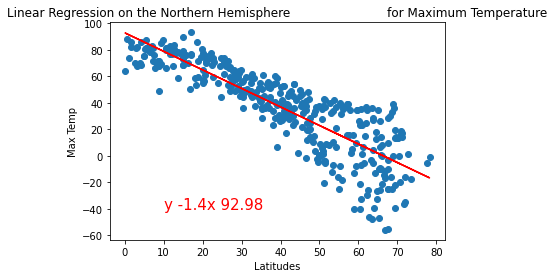

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))

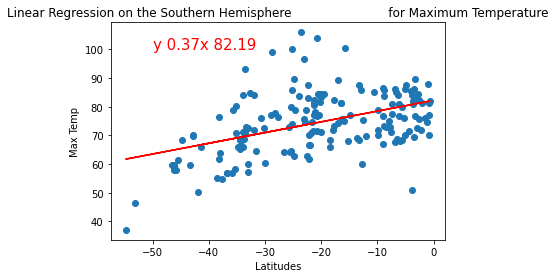

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,100))

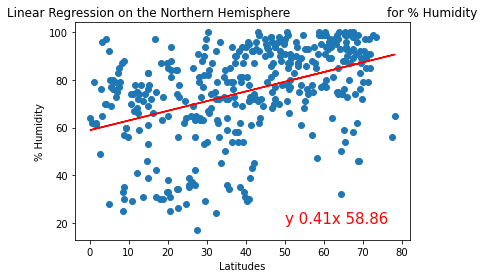

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(50,20))

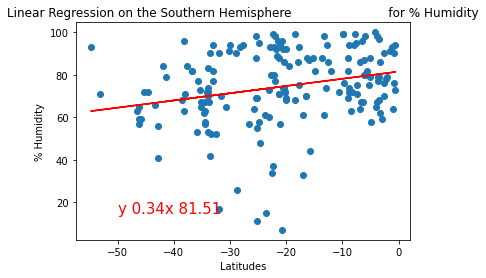

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

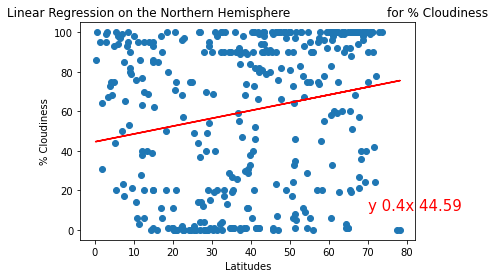

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(70,10))

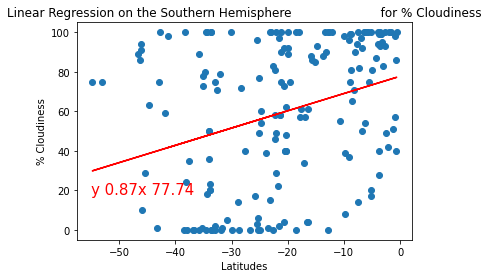

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Cloudiness', '% Cloudiness', (-55,18))

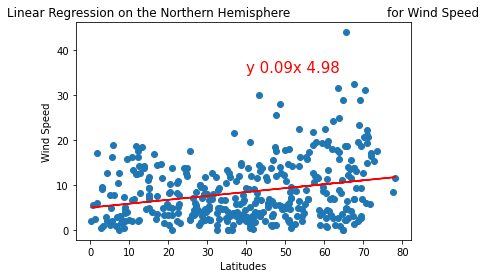

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

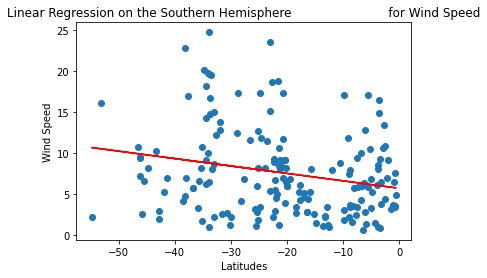

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))